In [123]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import glob

from sklearn.metrics import confusion_matrix
import itertools

from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv1D, MaxPool1D
from keras.initializers import random_uniform
from keras.layers.advanced_activations import LeakyReLU
from keras.callbacks import EarlyStopping

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler as SS

from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from matplotlib import pyplot as plt
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding,Dense,LSTM,Dropout,Flatten,BatchNormalization,Conv1D,GlobalMaxPooling1D,MaxPooling1D
from keras.optimizers import  SGD
import matplotlib.pyplot as plt
from keras.regularizers import l2
from keras.optimizers import Adam
from keras import regularizers
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import OneHotEncoder
from keras.preprocessing import sequence
from keras.layers import SimpleRNN
#from hyperas.distributions import uniform

from keras.utils.np_utils import to_categorical
from keras import regularizers
import pandas as pd
import string
import numpy as np
import matplotlib.pyplot as plt

# import warnings
import warnings
# filter warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_csv(r'...') # use your path

In [3]:
dataset.head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0.921987,78,0,5,20,0,1280,0,20.607666,254,...,1,2,0,0,0,1,1,0,7,1
1,0.921987,78,0,5,20,0,1280,0,20.607666,254,...,1,2,0,0,0,1,1,0,7,1
2,0.921987,78,0,5,20,0,1280,0,20.607666,254,...,1,2,0,0,0,1,1,0,1,1
3,0.921987,78,0,5,20,0,1280,0,20.607666,254,...,1,2,0,0,0,1,1,0,2,1
4,0.000009,97,0,5,2,0,104,0,111111.107200,254,...,1,2,0,0,0,1,1,0,3,1


In [5]:
# Splitting dataset into features and labels.

labels = dataset['label']
features = dataset.loc[:, dataset.columns != 'label'].astype('float64')

In [6]:
features.head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat
0,0.921987,78.0,0.0,5.0,20.0,0.0,1280.0,0.0,20.607666,254.0,...,1.0,1.0,2.0,0.0,0.0,0.0,1.0,1.0,0.0,7.0
1,0.921987,78.0,0.0,5.0,20.0,0.0,1280.0,0.0,20.607666,254.0,...,1.0,1.0,2.0,0.0,0.0,0.0,1.0,1.0,0.0,7.0
2,0.921987,78.0,0.0,5.0,20.0,0.0,1280.0,0.0,20.607666,254.0,...,1.0,1.0,2.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
3,0.921987,78.0,0.0,5.0,20.0,0.0,1280.0,0.0,20.607666,254.0,...,1.0,1.0,2.0,0.0,0.0,0.0,1.0,1.0,0.0,2.0
4,0.000009,97.0,0.0,5.0,2.0,0.0,104.0,0.0,111111.107200,254.0,...,1.0,1.0,2.0,0.0,0.0,0.0,1.0,1.0,0.0,3.0


In [7]:
# For scaling the data, we use RobustScaler class from sklearn.

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

In [8]:
scaler = RobustScaler()
scaler.fit(features)

features = scaler.transform(features)

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
LE = LabelEncoder()

LE.fit(labels)
labels = LE.transform(labels)

In [12]:
# Labels have been replaced with integers.

np.unique(labels)

array([0, 1], dtype=int64)

In [13]:
# Checking that encoding reversal works.

d = LE.inverse_transform(labels)
d = pd.Series(d)
d.unique()

array([1, 0], dtype=int64)

### Splitting the data

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
# The next step is to split training and testing data. For this we will use sklearn function train_test_split().

features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size= 0.2,random_state=1)

In [16]:
features_train.shape, labels_train.shape ,features_test.shape , labels_test.shape

((263476, 43), (263476,), (65870, 43), (65870,))

In [17]:
features_train,  features_val, labels_train, labels_val = train_test_split(features_train, labels_train, test_size=0.25, random_state=1)
features_train.shape, labels_train.shape ,features_test.shape , labels_test.shape, features_val.shape ,labels_val.shape

((197607, 43), (197607,), (65870, 43), (65870,), (65869, 43), (65869,))

In [18]:
import datetime
import os
log_dir = os.path.join("train_logs",datetime.datetime.now().strftime("%Y%m%d-%H%M%S"),)

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

# TF callback that stops training when best value of validationi loss function is reached
eary_stop_callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)

In [19]:
# this function has evaluation metrics
def report(prediction, y_true):
    print('        ----------Classification Report Of Classes-------------')
    print(classification_report(y_true,prediction))
    print('\n        ----------Validation Data------------------')
    print('Accuarcy:',accuracy_score(y_true, prediction)* 100)
    print('Precision: {:,.4f} %'.format(precision_score(y_true, prediction, average='weighted') * 100))
    print('Recall-score: {:,.4f}'.format(recall_score(y_true, prediction, average='weighted') * 100))
    print('F1-score: {:,.4f}'.format(f1_score(y_true, prediction, average='weighted') * 100))

In [20]:
# plotting loss graphs w.r.t each epoch
def plotgraphs(model):
    f, ax = plt.subplots()
    ax.plot([None] + model.history.history["accuracy"], 'o-')
    ax.plot([None] + model.history.history["val_accuracy"], 'x-')

    ax.legend(['Train_Accuracy', 'Val_Accuracy'], loc = 0)
    ax.set_title('Training/Val Accuracy Per Epoch')
    ax.set_xlabel('epoch')
    ax.set_ylabel('acc')
    plt.show()

    f, ax = plt.subplots()
    ax.plot([None] + model.history.history["loss"], 'o-')
    ax.plot([None] + model.history.history["val_loss"], 'x-')

    ax.legend(['Train_Loss', 'Val_Loss'], loc = 0)
    ax.set_title('Training/Val Losses Per Epoch')
    ax.set_xlabel('epoch')
    ax.set_ylabel('loss')
    plt.show()

### DNN Models

In [33]:
dnn1= Sequential()

dnn1.add(Dense(256, activation='relu', input_shape=(features_train.shape[1],)))
dnn1.add(Dropout(0.1))
dnn1.add(Dense(2, activation='softmax'))

dnn1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 256)               11264     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 514       
Total params: 11,778
Trainable params: 11,778
Non-trainable params: 0
_________________________________________________________________


In [34]:
dnn1.compile(loss = "sparse_categorical_crossentropy", optimizer='adam', metrics=['accuracy'])

In [35]:
dnn1.fit(features_train,labels_train,epochs=30,batch_size=64,
         validation_data=(features_val,labels_val),callbacks=[tensorboard_callback, eary_stop_callback])

Epoch 1/30
3088/3088 [==============================] - 10s 3ms/step - loss: 58.8505 - accuracy: 0.9006 - val_loss: 37.4748 - val_accuracy: 0.9757
Epoch 2/30
3088/3088 [==============================] - 10s 3ms/step - loss: 37.9659 - accuracy: 0.9730 - val_loss: 11.5377 - val_accuracy: 0.9863
Epoch 3/30
3088/3088 [==============================] - 10s 3ms/step - loss: 49.9141 - accuracy: 0.9802 - val_loss: 22.4493 - val_accuracy: 0.9883
Epoch 4/30
3088/3088 [==============================] - 10s 3ms/step - loss: 16.5892 - accuracy: 0.9856 - val_loss: 2.1149 - val_accuracy: 0.9947
Epoch 5/30
3088/3088 [==============================] - 9s 3ms/step - loss: 7.1624 - accuracy: 0.9907 - val_loss: 3.8862 - val_accuracy: 0.9884
Epoch 6/30
3088/3088 [==============================] - 8s 2ms/step - loss: 0.8266 - accuracy: 0.9930 - val_loss: 0.0226 - val_accuracy: 0.9903
Epoch 7/30
3088/3088 [==============================] - 8s 2ms/step - loss: 0.0234 - accuracy: 0.9935 - val_loss: 0.0165 - va

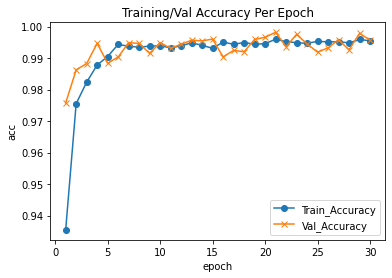

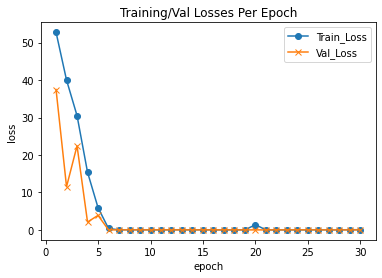

In [36]:
plotgraphs(dnn1)

In [37]:
predict = np.argmax(dnn1.predict(features_test),axis=1)

a = np.unique(predict)
b = np.unique(labels_test)
c = list(set(a) | set(b))

In [38]:
report(predict,labels_test)

        ----------Classification Report Of Classes-------------
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     32881
           1       1.00      0.99      1.00     32989

    accuracy                           1.00     65870
   macro avg       1.00      1.00      1.00     65870
weighted avg       1.00      1.00      1.00     65870


        ----------Validation Data------------------
Accuarcy: 99.60528313344467
Precision: 99.6080 %
Recall-score: 99.6053
F1-score: 99.6053


In [39]:
dnn2= Sequential()
dnn2.add(Dense(256, activation='relu', input_shape=(features_train.shape[1],)))
dnn2.add(Dropout(0.1))
dnn2.add(Dense(128, activation='relu'))
dnn2.add(Dropout(0.1))
dnn2.add(Dense(2, activation = 'softmax'))

dnn2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 256)               11264     
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 258       
Total params: 44,418
Trainable params: 44,418
Non-trainable params: 0
_________________________________________________________________


In [40]:
dnn2.compile(loss = 'sparse_categorical_crossentropy', optimizer= 'adam', metrics = ['accuracy'])

In [41]:
dnn2.fit(features_train,labels_train,epochs=30,batch_size=64,
         validation_data=(features_val,labels_val),callbacks=[tensorboard_callback, eary_stop_callback])

Epoch 1/30
3088/3088 [==============================] - 12s 4ms/step - loss: 60.7072 - accuracy: 0.9154 - val_loss: 0.0663 - val_accuracy: 0.9780
Epoch 2/30
3088/3088 [==============================] - 13s 4ms/step - loss: 0.1272 - accuracy: 0.9775 - val_loss: 0.0331 - val_accuracy: 0.9838
Epoch 3/30
3088/3088 [==============================] - 13s 4ms/step - loss: 0.0370 - accuracy: 0.9835 - val_loss: 0.0289 - val_accuracy: 0.9867
Epoch 4/30
3088/3088 [==============================] - 13s 4ms/step - loss: 0.0380 - accuracy: 0.9850 - val_loss: 0.0264 - val_accuracy: 0.9872
Epoch 5/30
3088/3088 [==============================] - 14s 4ms/step - loss: 0.0391 - accuracy: 0.9855 - val_loss: 0.0283 - val_accuracy: 0.9860
Epoch 6/30
3088/3088 [==============================] - 14s 4ms/step - loss: 0.0299 - accuracy: 0.9867 - val_loss: 0.0287 - val_accuracy: 0.9854
Epoch 7/30
3088/3088 [==============================] - 14s 4ms/step - loss: 0.0517 - accuracy: 0.9861 - val_loss: 0.0272 - val_a

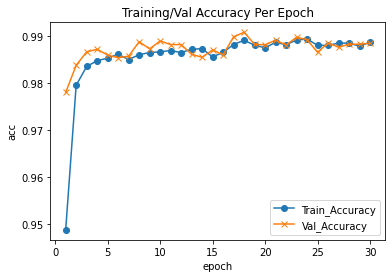

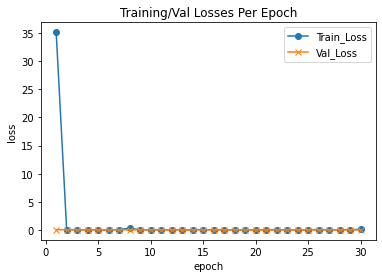

In [42]:
plotgraphs(dnn2)

In [43]:
predict = np.argmax(dnn2.predict(features_test),axis=1)

a = np.unique(predict)
b = np.unique(labels_test)
c = list(set(a) | set(b))

In [44]:
report(predict,labels_test)

        ----------Classification Report Of Classes-------------
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     32881
           1       1.00      0.98      0.99     32989

    accuracy                           0.99     65870
   macro avg       0.99      0.99      0.99     65870
weighted avg       0.99      0.99      0.99     65870


        ----------Validation Data------------------
Accuarcy: 98.82799453468955
Precision: 98.8546 %
Recall-score: 98.8280
F1-score: 98.8279


In [46]:
dnn3= Sequential()

dnn3.add(Dense(256, activation='relu', input_shape=(features_train.shape[1],)))
dnn3.add(Dropout(0.1))
dnn3.add(Dense(128, activation='relu'))
dnn3.add(Dropout(0.1))
dnn3.add(Dense(64, activation='relu'))
dnn3.add(Dropout(0.1))

dnn3.add(Dense(2, activation = 'softmax'))

dnn3.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 256)               11264     
_________________________________________________________________
dropout_7 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_8 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_9 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 2)                

In [47]:
dnn3.compile(loss = 'sparse_categorical_crossentropy', optimizer= 'adam', metrics = ['accuracy'])

In [48]:
dnn3.fit(features_train,labels_train,epochs=30,batch_size=64,
         validation_data=(features_val,labels_val),callbacks=[tensorboard_callback, eary_stop_callback])

Epoch 1/30
3088/3088 [==============================] - 13s 4ms/step - loss: 28.2813 - accuracy: 0.9101 - val_loss: 0.0556 - val_accuracy: 0.9708
Epoch 2/30
3088/3088 [==============================] - 14s 5ms/step - loss: 0.1220 - accuracy: 0.9716 - val_loss: 0.0455 - val_accuracy: 0.9777
Epoch 3/30
3088/3088 [==============================] - 14s 5ms/step - loss: 0.0944 - accuracy: 0.9775 - val_loss: 0.0485 - val_accuracy: 0.9809
Epoch 4/30
3088/3088 [==============================] - 16s 5ms/step - loss: 0.0493 - accuracy: 0.9788 - val_loss: 0.0370 - val_accuracy: 0.9824
Epoch 5/30
3088/3088 [==============================] - 15s 5ms/step - loss: 0.0471 - accuracy: 0.9821 - val_loss: 0.0377 - val_accuracy: 0.9808
Epoch 6/30
3088/3088 [==============================] - 14s 5ms/step - loss: 0.0549 - accuracy: 0.9824 - val_loss: 0.0339 - val_accuracy: 0.9815
Epoch 7/30
3088/3088 [==============================] - 14s 5ms/step - loss: 0.0431 - accuracy: 0.9820 - val_loss: 0.0327 - val_a

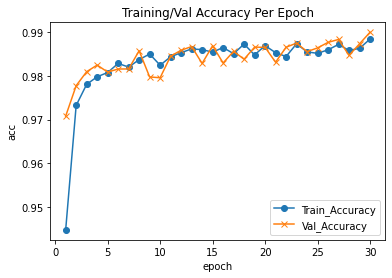

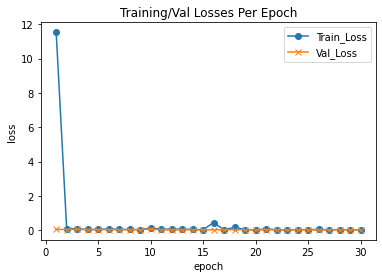

In [49]:
plotgraphs(dnn3)

In [50]:
predict = np.argmax(dnn3.predict(features_test),axis=1)

a = np.unique(predict)
b = np.unique(labels_test)
c = list(set(a) | set(b))

In [51]:
report(predict,labels_test)

        ----------Classification Report Of Classes-------------
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     32881
           1       1.00      0.98      0.99     32989

    accuracy                           0.99     65870
   macro avg       0.99      0.99      0.99     65870
weighted avg       0.99      0.99      0.99     65870


        ----------Validation Data------------------
Accuarcy: 98.94337331106725
Precision: 98.9650 %
Recall-score: 98.9434
F1-score: 98.9433


### CNN Models

In [52]:
# reshape input to be [samples, time steps, features]
y_train= to_categorical(labels_train)
y_test= to_categorical(labels_test)
y_val= to_categorical(labels_val)

X_train = np.array(features_train).reshape(features_train.shape[0], features_train.shape[1], 1)
X_test = np.array(features_test).reshape(features_test.shape[0], features_test.shape[1], 1)
X_val = np.array(features_val).reshape(features_val.shape[0], features_val.shape[1], 1)
X_train.shape , X_test.shape ,X_val.shape

((197607, 43, 1), (65870, 43, 1), (65869, 43, 1))

In [57]:
#hyperparameters
keras.backend.clear_session()
SEED = 1040941203
hidden_initializer = random_uniform(seed=SEED)


# create model
cnn1 = Sequential()
cnn1.add(Conv1D(64, 3, input_shape=(43, 1)))
cnn1.add(LeakyReLU(alpha=0.1))
cnn1.add(MaxPooling1D(pool_size=2))
cnn1.add(Dropout(0.3))


cnn1.add(Flatten())
cnn1.add(Dense(64, input_dim=2, kernel_initializer=hidden_initializer))
cnn1.add(LeakyReLU(alpha=0.1))
cnn1.add(Dense(32))
cnn1.add(LeakyReLU(alpha=0.1))
cnn1.add(Dense(2, activation='softmax'))

cnn1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 41, 64)            256       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 41, 64)            0         
_________________________________________________________________
dropout (Dropout)            (None, 41, 64)            0         
_________________________________________________________________
flatten (Flatten)            (None, 2624)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                168000    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2

In [59]:
cnn1.compile(loss = "categorical_crossentropy", optimizer='adam', metrics=['accuracy'])
cnn1.fit(X_train, y_train, epochs=30, batch_size=256,
         validation_data=(X_val,y_val),callbacks=[tensorboard_callback, eary_stop_callback])

Epoch 1/30
772/772 [==============================] - 24s 31ms/step - loss: 1.0263 - accuracy: 0.9737 - val_loss: 0.4783 - val_accuracy: 0.9847
Epoch 2/30
772/772 [==============================] - 23s 30ms/step - loss: 0.3556 - accuracy: 0.9820 - val_loss: 0.1415 - val_accuracy: 0.9889
Epoch 3/30
772/772 [==============================] - 23s 29ms/step - loss: 0.1562 - accuracy: 0.9858 - val_loss: 0.7145 - val_accuracy: 0.9874
Epoch 4/30
772/772 [==============================] - 17s 22ms/step - loss: 0.7054 - accuracy: 0.9828 - val_loss: 0.0409 - val_accuracy: 0.9919
Epoch 5/30
772/772 [==============================] - 19s 25ms/step - loss: 0.0588 - accuracy: 0.9916 - val_loss: 0.0222 - val_accuracy: 0.9945
Epoch 6/30
772/772 [==============================] - 20s 26ms/step - loss: 0.0467 - accuracy: 0.9934 - val_loss: 0.3227 - val_accuracy: 0.9967
Epoch 7/30
772/772 [==============================] - 18s 23ms/step - loss: 0.1265 - accuracy: 0.9914 - val_loss: 0.0279 - val_accuracy:

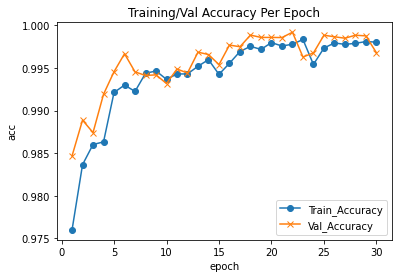

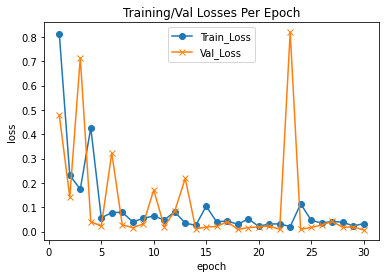

In [60]:
plotgraphs(cnn1)

In [61]:
predict = np.argmax(cnn1.predict(X_test),axis=1)

a = np.unique(predict)
b = np.unique(y_test)
c = list(set(a) | set(b))

In [62]:
report(predict,labels_test)

        ----------Classification Report Of Classes-------------
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     32881
           1       0.99      1.00      1.00     32989

    accuracy                           1.00     65870
   macro avg       1.00      1.00      1.00     65870
weighted avg       1.00      1.00      1.00     65870


        ----------Validation Data------------------
Accuarcy: 99.6660088052224
Precision: 99.6677 %
Recall-score: 99.6660
F1-score: 99.6660


In [66]:
#hyperparameters
keras.backend.clear_session()
SEED = 1040941203
hidden_initializer = random_uniform(seed=SEED)


# create model
cnn2 = Sequential()
cnn2.add(Conv1D(64, 3, input_shape=(43, 1)))
cnn2.add(LeakyReLU(alpha=0.1))
cnn2.add(MaxPooling1D(pool_size=2))
cnn2.add(Dropout(0.3))

cnn2.add(Conv1D(64, 1))
cnn2.add(LeakyReLU(alpha=0.1))
cnn2.add(MaxPooling1D(pool_size=2))
cnn2.add(Dropout(0.3))

cnn2.add(Flatten())
cnn2.add(Dense(64, input_dim=2, kernel_initializer=hidden_initializer))
cnn2.add(LeakyReLU(alpha=0.1))
cnn2.add(Dense(32))
cnn2.add(LeakyReLU(alpha=0.1))
cnn2.add(Dense(2, activation='softmax'))

cnn2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 41, 64)            256       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 41, 64)            0         
_________________________________________________________________
dropout (Dropout)            (None, 41, 64)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 41, 64)            4160      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 41, 64)            0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 41, 64)            0         
_________________________________________________________________
flatten (Flatten)            (None, 2624)              0

In [67]:
cnn2.compile(loss = "categorical_crossentropy", optimizer='adam', metrics=['accuracy'])
cnn2.fit(X_train, y_train, epochs=30, batch_size=256,
         validation_data=(X_val,y_val),callbacks=[tensorboard_callback, eary_stop_callback])

Epoch 1/30
772/772 [==============================] - 46s 58ms/step - loss: 4.8828 - accuracy: 0.8978 - val_loss: 0.8048 - val_accuracy: 0.9701
Epoch 2/30
772/772 [==============================] - 43s 55ms/step - loss: 0.7604 - accuracy: 0.9611 - val_loss: 0.1479 - val_accuracy: 0.9877
Epoch 3/30
772/772 [==============================] - 46s 59ms/step - loss: 0.2123 - accuracy: 0.9747 - val_loss: 0.1526 - val_accuracy: 0.9889
Epoch 4/30
772/772 [==============================] - 42s 54ms/step - loss: 0.2866 - accuracy: 0.9773 - val_loss: 0.2512 - val_accuracy: 0.9746
Epoch 5/30
772/772 [==============================] - 41s 53ms/step - loss: 0.1343 - accuracy: 0.9841 - val_loss: 0.1090 - val_accuracy: 0.9893
Epoch 6/30
772/772 [==============================] - 38s 49ms/step - loss: 0.3598 - accuracy: 0.9809 - val_loss: 0.1678 - val_accuracy: 0.9951
Epoch 7/30
772/772 [==============================] - 43s 55ms/step - loss: 0.1026 - accuracy: 0.9865 - val_loss: 0.0848 - val_accuracy:

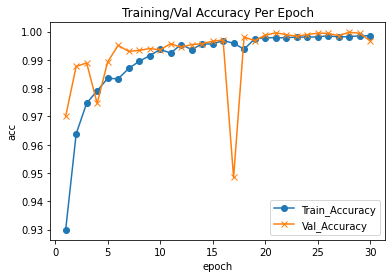

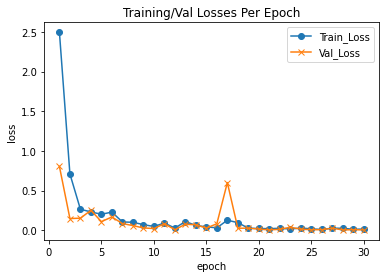

In [68]:
plotgraphs(cnn2)

In [69]:
predict = np.argmax(cnn2.predict(X_test),axis=1)

a = np.unique(predict)
b = np.unique(y_test)
c = list(set(a) | set(b))

In [70]:
report(predict,labels_test)

        ----------Classification Report Of Classes-------------
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     32881
           1       0.99      1.00      1.00     32989

    accuracy                           1.00     65870
   macro avg       1.00      1.00      1.00     65870
weighted avg       1.00      1.00      1.00     65870


        ----------Validation Data------------------
Accuarcy: 99.66449066342797
Precision: 99.6662 %
Recall-score: 99.6645
F1-score: 99.6645


In [71]:
#hyperparameters
keras.backend.clear_session()
SEED = 1040941203
hidden_initializer = random_uniform(seed=SEED)


# create model
cnn3 = Sequential()
cnn3.add(Conv1D(64, 3, input_shape=(43, 1)))
cnn3.add(LeakyReLU(alpha=0.1))
cnn3.add(MaxPooling1D(pool_size=2))
cnn3.add(Dropout(0.3))

cnn3.add(Conv1D(64, 1))
cnn3.add(LeakyReLU(alpha=0.1))
cnn3.add(MaxPooling1D(pool_size=2))
cnn3.add(Dropout(0.3))

cnn3.add(Conv1D(64, 1))
cnn3.add(LeakyReLU(alpha=0.1))
cnn3.add(MaxPooling1D(pool_size=2))
cnn3.add(Dropout(0.3))

cnn3.add(Flatten())
cnn3.add(Dense(64, input_dim=2, kernel_initializer=hidden_initializer))
cnn3.add(LeakyReLU(alpha=0.1))
cnn3.add(Dense(32))
cnn3.add(LeakyReLU(alpha=0.1))
cnn3.add(Dense(2, activation='softmax'))

cnn3.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 41, 64)            256       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 41, 64)            0         
_________________________________________________________________
dropout (Dropout)            (None, 41, 64)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 41, 64)            4160      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 41, 64)            0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 41, 64)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 41, 64)            4

In [72]:
cnn3.compile(loss = "categorical_crossentropy", optimizer='adam', metrics=['accuracy'])
cnn3.fit(X_train, y_train, epochs=30, batch_size=256,
         validation_data=(X_val,y_val),callbacks=[tensorboard_callback, eary_stop_callback])

Epoch 1/30
772/772 [==============================] - 55s 71ms/step - loss: 8.6502 - accuracy: 0.8887 - val_loss: 3.0546 - val_accuracy: 0.9678
Epoch 2/30
772/772 [==============================] - 54s 70ms/step - loss: 1.6237 - accuracy: 0.9517 - val_loss: 0.0744 - val_accuracy: 0.9671
Epoch 3/30
772/772 [==============================] - 53s 69ms/step - loss: 0.6611 - accuracy: 0.9655 - val_loss: 0.1164 - val_accuracy: 0.9710
Epoch 4/30
772/772 [==============================] - 51s 66ms/step - loss: 0.4357 - accuracy: 0.9717 - val_loss: 0.3237 - val_accuracy: 0.9886
Epoch 5/30
772/772 [==============================] - 55s 71ms/step - loss: 0.4061 - accuracy: 0.9771 - val_loss: 0.2497 - val_accuracy: 0.9917
Epoch 6/30
772/772 [==============================] - 55s 72ms/step - loss: 0.3382 - accuracy: 0.9813 - val_loss: 0.0999 - val_accuracy: 0.9937
Epoch 7/30
772/772 [==============================] - 57s 74ms/step - loss: 0.2169 - accuracy: 0.9853 - val_loss: 0.2128 - val_accuracy:

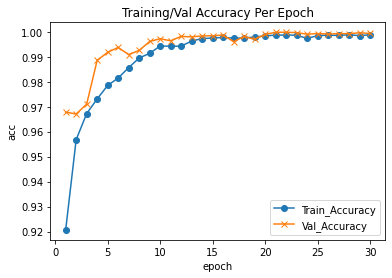

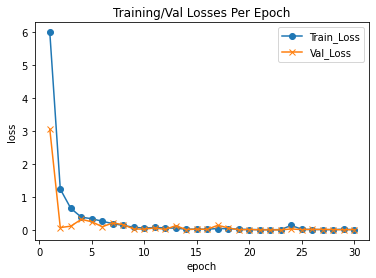

In [73]:
plotgraphs(cnn3)

In [74]:
predict = np.argmax(cnn3.predict(X_test),axis=1)

a = np.unique(predict)
b = np.unique(y_test)
c = list(set(a) | set(b))

In [75]:
report(predict,labels_test)

        ----------Classification Report Of Classes-------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     32881
           1       1.00      1.00      1.00     32989

    accuracy                           1.00     65870
   macro avg       1.00      1.00      1.00     65870
weighted avg       1.00      1.00      1.00     65870


        ----------Validation Data------------------
Accuarcy: 99.94231061181115
Precision: 99.9424 %
Recall-score: 99.9423
F1-score: 99.9423


### RNN Models

In [76]:
# reshape input to be [samples, time steps, features] for RNN
RNN_features_train = np.reshape(features_train, (features_train.shape[0],features_train.shape[1],1))
RNN_features_test = np.reshape(features_test, (features_test.shape[0],features_test.shape[1],1))
RNN_features_val = np.reshape(features_val, (features_val.shape[0],features_val.shape[1],1))

In [118]:
#hyperparameters

# Initialising the RNN
rnn3 = Sequential()

# Adding the first RNN layer and some Dropout regularisation
rnn3.add(SimpleRNN(units = 32,activation='relu', return_sequences = True,  input_shape = (43,1)))
rnn3.add(Dropout(0.3))

# Adding a second RNN layer and some Dropout regularisation
rnn3.add(SimpleRNN(units = 32,activation='relu', return_sequences = True))
rnn3.add(Dropout(0.3))

# Adding a third RNN layer and some Dropout regularisation
rnn3.add(SimpleRNN(units = 32,activation='relu', return_sequences = True))
rnn3.add(Dropout(0.3))

# Adding the output layer
rnn3.add(Flatten())
rnn3.add(Dense(64, input_dim=2, kernel_initializer=hidden_initializer))
rnn3.add(LeakyReLU(alpha=0.1))
rnn3.add(Dense(32))
rnn3.add(LeakyReLU(alpha=0.1))
rnn3.add(Dense(units = 2, activation='sigmoid'))

rnn3.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_14 (SimpleRNN)    (None, 43, 32)            1088      
_________________________________________________________________
dropout_17 (Dropout)         (None, 43, 32)            0         
_________________________________________________________________
simple_rnn_15 (SimpleRNN)    (None, 43, 32)            2080      
_________________________________________________________________
dropout_18 (Dropout)         (None, 43, 32)            0         
_________________________________________________________________
simple_rnn_16 (SimpleRNN)    (None, 43, 32)            2080      
_________________________________________________________________
dropout_19 (Dropout)         (None, 43, 32)            0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 1376)             

In [119]:
rnn3.compile(loss = "categorical_crossentropy", optimizer='adam', metrics=['accuracy'])
rnn3.fit(RNN_features_train, y_train, epochs=20, batch_size=512,
         validation_data=(RNN_features_val,y_val),callbacks=[tensorboard_callback, eary_stop_callback])

Epoch 1/20
386/386 [==============================] - 53s 129ms/step - loss: 7.4252 - accuracy: 0.8148 - val_loss: 0.5551 - val_accuracy: 0.9634
Epoch 2/20
386/386 [==============================] - 49s 126ms/step - loss: 1.2334 - accuracy: 0.9561 - val_loss: 0.7594 - val_accuracy: 0.9765
Epoch 3/20
386/386 [==============================] - 49s 126ms/step - loss: 0.6009 - accuracy: 0.9685 - val_loss: 0.3779 - val_accuracy: 0.9660
Epoch 4/20
386/386 [==============================] - 50s 129ms/step - loss: 0.3906 - accuracy: 0.9731 - val_loss: 0.2420 - val_accuracy: 0.9835
Epoch 5/20
386/386 [==============================] - 50s 129ms/step - loss: 0.2004 - accuracy: 0.9771 - val_loss: 0.1348 - val_accuracy: 0.9850
Epoch 6/20
386/386 [==============================] - 49s 128ms/step - loss: 0.1640 - accuracy: 0.9803 - val_loss: 0.2490 - val_accuracy: 0.9885
Epoch 7/20
386/386 [==============================] - 49s 126ms/step - loss: 0.1283 - accuracy: 0.9815 - val_loss: 0.0784 - val_ac

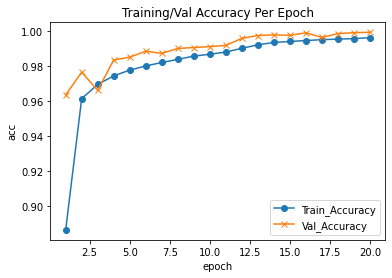

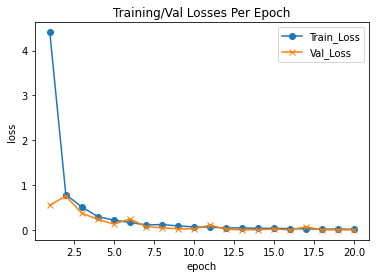

In [120]:
plotgraphs(rnn3)

In [121]:
predict = np.argmax(rnn3.predict(X_test),axis=1)

a = np.unique(predict)
b = np.unique(y_test)
c = list(set(a) | set(b))

In [122]:
report(predict,labels_test)

        ----------Classification Report Of Classes-------------
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     32881
           1       1.00      0.98      0.99     32989

    accuracy                           0.99     65870
   macro avg       0.99      0.99      0.99     65870
weighted avg       0.99      0.99      0.99     65870


        ----------Validation Data------------------
Accuarcy: 99.08607863974495
Precision: 99.1009 %
Recall-score: 99.0861
F1-score: 99.0860


In [104]:
#hyperparameters

# Initialising the RNN
rnn2 = Sequential()

# Adding the first RNN layer and some Dropout regularisation
rnn2.add(SimpleRNN(units = 64,activation='relu', return_sequences = True,  input_shape = (43,1)))
rnn2.add(Dropout(0.3))

# Adding a third RNN layer and some Dropout regularisation
rnn2.add(SimpleRNN(units = 64,activation='relu', return_sequences = True))
rnn2.add(Dropout(0.3))

# Adding the output layer
rnn2.add(Flatten())
rnn2.add(Dense(64, input_dim=2, kernel_initializer=hidden_initializer))
rnn2.add(LeakyReLU(alpha=0.1))
rnn2.add(Dense(32))
rnn2.add(LeakyReLU(alpha=0.1))
rnn2.add(Dense(units = 2, activation='sigmoid'))

rnn2.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_9 (SimpleRNN)     (None, 43, 64)            4224      
_________________________________________________________________
dropout_12 (Dropout)         (None, 43, 64)            0         
_________________________________________________________________
simple_rnn_10 (SimpleRNN)    (None, 43, 64)            8256      
_________________________________________________________________
dropout_13 (Dropout)         (None, 43, 64)            0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 2752)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 64)                176192    
_________________________________________________________________
leaky_re_lu_15 (LeakyReLU)   (None, 64)               

In [105]:
rnn2.compile(loss = "categorical_crossentropy", optimizer='adam', metrics=['accuracy'])
rnn2.fit(RNN_features_train, y_train, epochs=20, batch_size=128,
         validation_data=(RNN_features_val,y_val),callbacks=[tensorboard_callback, eary_stop_callback])

Epoch 1/20
198/198 [==============================] - 66s 321ms/step - loss: 4.7928 - accuracy: 0.8593 - val_loss: 0.1927 - val_accuracy: 0.9682
Epoch 2/20
198/198 [==============================] - 63s 317ms/step - loss: 0.7046 - accuracy: 0.9743 - val_loss: 0.0751 - val_accuracy: 0.9916
Epoch 3/20
198/198 [==============================] - 58s 293ms/step - loss: 0.5383 - accuracy: 0.9821 - val_loss: 0.3014 - val_accuracy: 0.9916
Epoch 4/20
198/198 [==============================] - 54s 272ms/step - loss: 0.1983 - accuracy: 0.9893 - val_loss: 0.0695 - val_accuracy: 0.9961
Epoch 5/20
198/198 [==============================] - 51s 257ms/step - loss: 0.0864 - accuracy: 0.9953 - val_loss: 0.0660 - val_accuracy: 0.9973
Epoch 6/20
198/198 [==============================] - 50s 253ms/step - loss: 0.1771 - accuracy: 0.9945 - val_loss: 0.0470 - val_accuracy: 0.9979
Epoch 7/20
198/198 [==============================] - 47s 240ms/step - loss: 0.1037 - accuracy: 0.9964 - val_loss: 0.3103 - val_ac

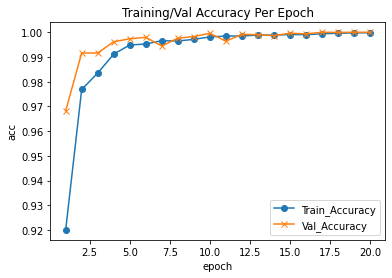

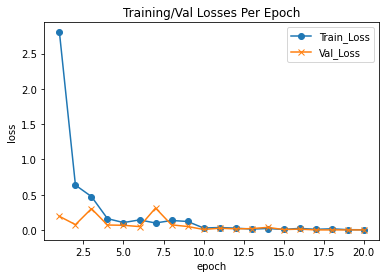

In [106]:
plotgraphs(rnn2)

In [107]:
predict = np.argmax(rnn2.predict(X_test),axis=1)

a = np.unique(predict)
b = np.unique(y_test)
c = list(set(a) | set(b))

In [108]:
report(predict,labels_test)

        ----------Classification Report Of Classes-------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     32881
           1       1.00      1.00      1.00     32989

    accuracy                           1.00     65870
   macro avg       1.00      1.00      1.00     65870
weighted avg       1.00      1.00      1.00     65870


        ----------Validation Data------------------
Accuarcy: 99.99544557461667
Precision: 99.9954 %
Recall-score: 99.9954
F1-score: 99.9954


In [99]:
#hyperparameters

# Initialising the RNN
rnn1 = Sequential()

# Adding the first RNN layer and some Dropout regularisation
rnn1.add(SimpleRNN(units = 64,activation='relu', return_sequences = True,  input_shape = (43,1)))
rnn1.add(Dropout(0.3))

# Adding the output layer
rnn1.add(Flatten())
rnn1.add(Dense(64, input_dim=2, kernel_initializer=hidden_initializer))
rnn1.add(LeakyReLU(alpha=0.1))
rnn1.add(Dense(32))
rnn1.add(LeakyReLU(alpha=0.1))
rnn1.add(Dense(units = 2, activation='sigmoid'))

rnn1.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_8 (SimpleRNN)     (None, 43, 64)            4224      
_________________________________________________________________
dropout_11 (Dropout)         (None, 43, 64)            0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 2752)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 64)                176192    
_________________________________________________________________
leaky_re_lu_13 (LeakyReLU)   (None, 64)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 32)                2080      
_________________________________________________________________
leaky_re_lu_14 (LeakyReLU)   (None, 32)               

In [100]:
rnn1.compile(loss = "categorical_crossentropy", optimizer='adam', metrics=['accuracy'])
rnn1.fit(RNN_features_train, y_train, epochs=20, batch_size=128,
         validation_data=(RNN_features_val,y_val),callbacks=[tensorboard_callback, eary_stop_callback])

Epoch 1/20
1544/1544 [==============================] - 38s 24ms/step - loss: 7.8049 - accuracy: 0.9363 - val_loss: 1.0391 - val_accuracy: 0.9863
Epoch 2/20
1544/1544 [==============================] - 36s 23ms/step - loss: 1.3815 - accuracy: 0.9824 - val_loss: 0.3401 - val_accuracy: 0.9912
Epoch 3/20
1544/1544 [==============================] - 37s 24ms/step - loss: 0.2796 - accuracy: 0.9891 - val_loss: 0.0779 - val_accuracy: 0.9945
Epoch 4/20
1544/1544 [==============================] - 40s 26ms/step - loss: 0.1331 - accuracy: 0.9928 - val_loss: 0.1825 - val_accuracy: 0.9920
Epoch 5/20
1544/1544 [==============================] - 41s 27ms/step - loss: 0.1858 - accuracy: 0.9931 - val_loss: 0.0745 - val_accuracy: 0.9957
Epoch 6/20
1544/1544 [==============================] - 47s 30ms/step - loss: 0.0618 - accuracy: 0.9954 - val_loss: 0.0618 - val_accuracy: 0.9966
Epoch 7/20
1544/1544 [==============================] - 47s 30ms/step - loss: 0.0430 - accuracy: 0.9955 - val_loss: 0.0051 -

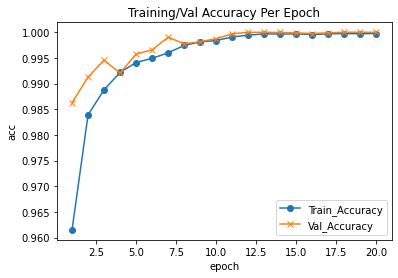

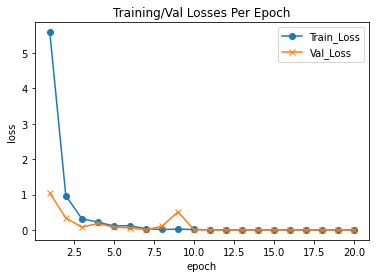

In [101]:
plotgraphs(rnn1)

In [102]:
predict = np.argmax(rnn1.predict(X_test),axis=1)

a = np.unique(predict)
b = np.unique(y_test)
c = list(set(a) | set(b))

In [103]:
report(predict,labels_test)

        ----------Classification Report Of Classes-------------
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     32881
           1       1.00      0.94      0.97     32989

    accuracy                           0.97     65870
   macro avg       0.97      0.97      0.97     65870
weighted avg       0.97      0.97      0.97     65870


        ----------Validation Data------------------
Accuarcy: 96.91209959010172
Precision: 97.0920 %
Recall-score: 96.9121
F1-score: 96.9093
